# Summary stats

In [1]:
import os
import pandas as pd
import seaborn as sns
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
metadata_csv = "../../gc_metadata.csv"
cell_table_csv = "../results/observed-seqs.csv"
ranking_subdir = "default"
nds_lb_summary_csv = "../results/notebooks/NDS_LB/default/data.csv"
outbase = "_ignore/cell-summaries"
workflow_env_exec = False

In [3]:
output_dir = f"{outbase}/{ranking_subdir}"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
metadata = pd.read_csv(metadata_csv, index_col=0).query("cell_type == 'GC' and strain == 'wt'")
metadata

,ngs_id,imm_duration,mouse,gc,strain,node,cell_type,plate,hc_barcode,lc_barcode,row,col
uid,,,,,,,,,,,,
D15_M1_GC1,PR-2-01,d15,1,1,wt,RP,GC,2,9,9,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M1_GC2,PR-2-01,d15,1,2,wt,RI,GC,3,2,1,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M1_GC3,PR-2-01,d15,1,3,wt,LI,GC,4,14,2,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M2_GC4,PR-2-01,d15,2,4,wt,RP,GC,5,10,11,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D15_M3_GC5,PR-2-01,d15,3,5,wt,RP,GC,6,7,4,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
...,...,...,...,...,...,...,...,...,...,...,...,...
D20_M24_GC115,PR-1-04,d20,24,115,wt,RP,GC,72,16,16,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D20_M25_GC116,PR-1-02,d20,25,116,wt,RP,GC,65,8,8,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12
D20_M25_GC117,PR-1-03,d20,25,117,wt,RP,GC,68,9,9,A.B.C.D.E.F.G.H,1.2.3.4.5.6.7.8.9.10.11.12


## Cell-wise stats

In [5]:
cell_table = pd.read_csv(cell_table_csv).query("uid in @metadata.index")
cell_table.to_csv(f"{output_dir}/cell_table.csv", index=False)
cell_table

,ID_HK,well,uid,ngs_id,mouse,gc,node,cell_type,imm_duration,aa_substitutions_IMGT,...,fasta_header_HC,fasta_header_LC,fasta_seq_HC,fasta_seq_LC,partis_sequence_HC,partis_sequence_LC,seq_aa_HC,seq_aa_LC,seq_nt_HC,seq_nt_LC
0,230512P16A01HK,A01,D15_M10_GC20,PR-2-01,10,20,LP,GC,d15,P15(H)F S57(H)N Q86(H)H Y102(H)C A105(H)G A40(...,...,PR-2-01.230512.P16.A01.H.R.1-126,PR-2-01.230512.P10.A01.K.R.1-589,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAATTTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAATTTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKFSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaattttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
1,230512P16A02HK,A02,D15_M10_GC20,PR-2-01,10,20,LP,GC,d15,S64(H)R T96(H)P A105(H)G Y114(L)F,...,PR-2-01.230512.P16.A02.H.R.1-69,PR-2-01.230512.P10.A02.K.R.1-232,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
2,230512P16A03HK,A03,D15_M10_GC20,PR-2-01,10,20,LP,GC,d15,A105(H)G M11(L)V G36(L)V N108(L)K,...,PR-2-01.230512.P16.A03.H.R.1-60,PR-2-01.230512.P10.A03.K.R.1-412,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCGTGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCGTGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFVSTSVGDRVSVTCKASQNVVTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcgtgtccacatcagtag...
3,230512P16A04HK,A04,D15_M10_GC20,PR-2-01,10,20,LP,GC,d15,N40(H)D Y58(H)F S64(H)R A105(H)G A52(L)T N108(...,...,PR-2-01.230512.P16.A04.H.R.1-48,PR-2-01.230512.P10.A04.K.R.1-277,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWDWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKT...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
4,230512P16A05HK,A05,D15_M10_GC20,PR-2-01,10,20,LP,GC,d15,Y88(H)C A105(H)G Q105(L)H,...,PR-2-01.230512.P16.A05.H.R.1-66,PR-2-01.230512.P10.A05.K.R.1-389,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8739,220124P16H05HK,H05,D20_M25_GC119,PR-1-08,25,119,RP,GC,d20,A105(H)G T88(L)A S92(L)T Q105(L)H N108(L)I S10...,...,PR-1-08.220124.P16.H05.H.R.1-68,PR-1-08.220124.P16.H05.K.R.1-31,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,EVQLQESGPSLVKPSQTLSLTCSVTGDSITSGYWNWIRKFPGNKLE...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,gaggtgcagcttcaggagtcaggacctagcctcgtgaaaccttctc...,gacattgtgatgactcagtctcaaaaattcatgtccacatcagtag...
8740,220124P16H06HK,H06,D20_M25_GC119,PR-1-08,25,119,RP,GC,d20,S64(H)I A105(H)G L124(L)V,...,PR-1-08.220124.P16.H06.H.R.1-49,PR-1-08.220124.P16.H06.K.R.1-64,GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTC...,GTGTTGATGGAGACATTGTGATGACTCAGTCTCAAAAATTCATGTC...,GAGGTGCAGCTTCAGGAGTCAG

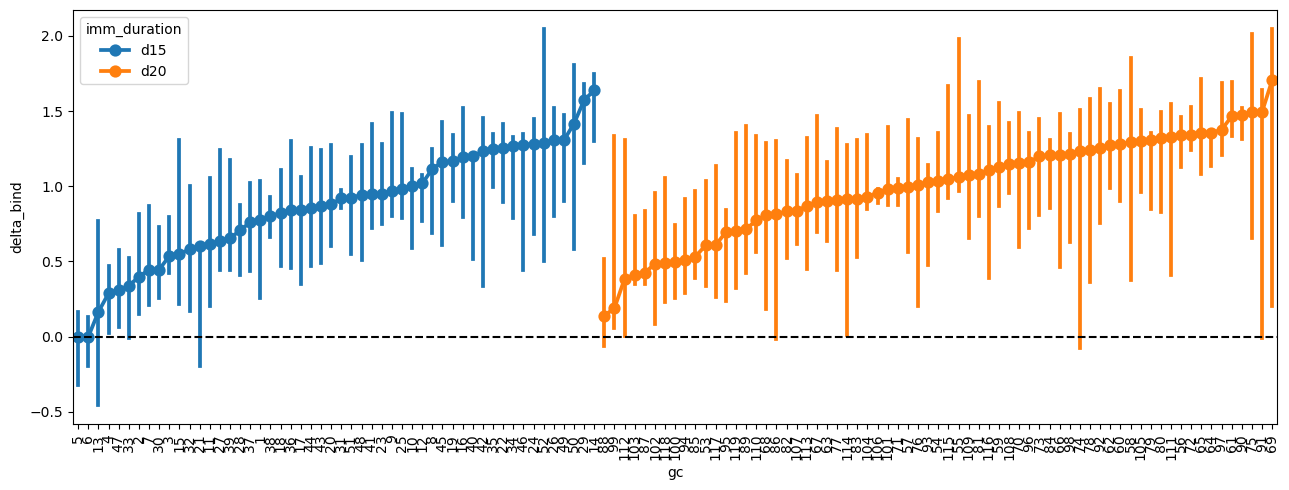

In [6]:
plt.figure(figsize=(13, 5))
sns.pointplot(
    data=cell_table,
    hue="imm_duration",
    x="gc", order=cell_table.groupby("gc").agg(dict(imm_duration="first", delta_bind="median")).sort_values(["imm_duration", "delta_bind"]).index,
    y="delta_bind",
    estimator="median",
    errorbar=("pi", 50),
    )
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{output_dir}/delta_bind.pdf")
plt.show()

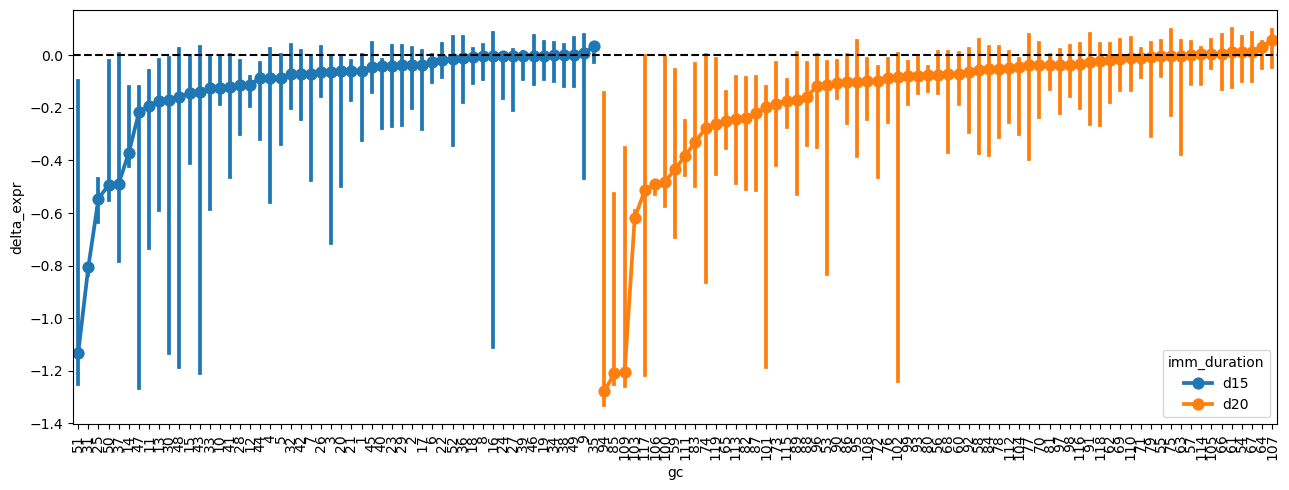

In [7]:
plt.figure(figsize=(13, 5))
sns.pointplot(
    data=cell_table,
    hue="imm_duration",
    x="gc", order=cell_table.groupby("gc").agg(dict(imm_duration="first", delta_expr="median")).sort_values(["imm_duration", "delta_expr"]).index,
    y="delta_expr",
    estimator="median",
    errorbar=("pi", 50),
    )
plt.axhline(0, color="black", linestyle="--")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f"{output_dir}/delta_expr.pdf")
plt.show()

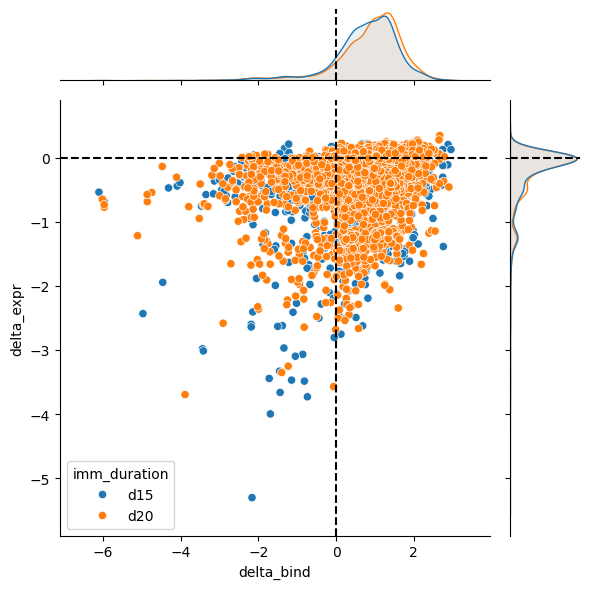

In [8]:

g = sns.JointGrid(data=cell_table, x="delta_bind", y="delta_expr", hue="imm_duration")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot, common_norm=False, fill=True, alpha=0.1)
g.ax_joint.axvline(0, color="black", linestyle="--")
g.ax_joint.axhline(0, color="black", linestyle="--")
g.ax_marg_x.axvline(0, color="black", linestyle="--")
g.ax_marg_y.axhline(0, color="black", linestyle="--")
plt.tight_layout()
plt.savefig(f"{output_dir}/joint_cells.pdf")
plt.show()

## GC-wise stats

In [9]:
gc_summary = (
    (
        cell_table.groupby("gc").agg(
            uid = pd.NamedAgg(column="uid", aggfunc="first"),
            mouse = pd.NamedAgg(column="mouse", aggfunc="first"),
            ngs_id = pd.NamedAgg(column="ngs_id", aggfunc="first"),
            sampling_time=pd.NamedAgg(column="imm_duration", aggfunc="first"),
            cells_sampled=pd.NamedAgg(column="uid", aggfunc="count"),
            median_delta_bind=pd.NamedAgg(column="delta_bind", aggfunc="median"),
            median_delta_expr=pd.NamedAgg(column="delta_expr", aggfunc="median")
        )
    )
    .reset_index()
    .set_index("uid")
    .rename(
        columns={
            'median_delta_bind': 'median Δaffinity',
            'median_delta_expr': 'median Δexpression'
        }
    )
)

gc_summary

,gc,mouse,ngs_id,sampling_time,cells_sampled,median Δaffinity,median Δexpression
uid,,,,,,,
D15_M1_GC1,1,1,PR-2-01,d15,67,0.773400,-0.05788
D15_M1_GC2,2,1,PR-2-01,d15,79,0.397360,-0.03688
D15_M1_GC3,3,1,PR-2-01,d15,73,0.535100,-0.06153
D15_M2_GC4,4,2,PR-2-01,d15,44,0.287630,-0.08646
D15_M3_GC5,5,3,PR-2-01,d15,78,0.000000,-0.08452
...,...,...,...,...,...,...,...
D20_M24_GC115,115,24,PR-1-04,d20,85,1.046480,-0.17240
D20_M25_GC116,116,25,PR-1-02,d20,78,1.105020,-0.03121
D20_M25_GC117,117,25,PR-1-03,d20,76,0.608315,-0.51338


In [10]:
cols_to_keep = [
    # 'cells sampled',
    'normalized dominance score',
    'maximum REI',
    'max Δaffinity',
    '95th percentile Δaffinity',
    # 'mean Δaffinity',
    # 'median Δaffinity', 
    'id of max REI node', 
    'mutations in max REI node', 
    'Δaffinity of max REI node',
    'ΔΔaffinity of max REI node',
    'max REI node is root'
]
nds_lb = pd.read_csv(nds_lb_summary_csv, index_col="uid")[cols_to_keep]
nds_lb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, D20_M22_GC96 to D15_M13_GC31
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   normalized dominance score  119 non-null    float64
 1   maximum REI                 119 non-null    float64
 2   max Δaffinity               119 non-null    float64
 3   95th percentile Δaffinity   119 non-null    float64
 4   id of max REI node          119 non-null    object 
 5   mutations in max REI node   113 non-null    object 
 6   Δaffinity of max REI node   119 non-null    float64
 7   ΔΔaffinity of max REI node  119 non-null    float64
 8   max REI node is root        119 non-null    bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 8.5+ KB


In [11]:
gc_summary = gc_summary.join(nds_lb)
gc_summary.to_csv(f"{output_dir}/gc_summary.csv")

In [ ]:
gc_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, D15_M1_GC1 to D20_M25_GC119
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gc                          119 non-null    int64  
 1   mouse                       119 non-null    int64  
 2   ngs_id                      119 non-null    object 
 3   sampling_time               119 non-null    object 
 4   cells_sampled               119 non-null    int64  
 5   median Δaffinity            119 non-null    float64
 6   median Δexpression          119 non-null    float64
 7   normalized dominance score  119 non-null    float64
 8   maximum REI                 119 non-null    float64
 9   max Δaffinity               119 non-null    float64
 10  95th percentile Δaffinity   119 non-null    float64
 11  id of max REI node          119 non-null    object 
 12  mutations in max REI node   113 non-null    object 
 13  Δaffinity of max REI 

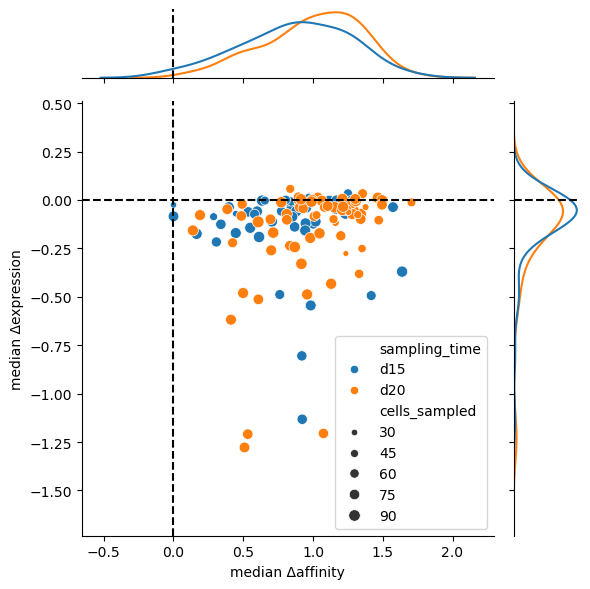

In [13]:
g = sns.JointGrid(data=gc_summary, x="median Δaffinity", y="median Δexpression", hue="sampling_time")
g.plot_joint(sns.scatterplot, size=gc_summary.cells_sampled)
g.plot_marginals(sns.kdeplot, common_norm=False)
g.ax_joint.axvline(0, color="black", linestyle="--")
g.ax_joint.axhline(0, color="black", linestyle="--")
g.ax_marg_x.axvline(0, color="black", linestyle="--")
g.ax_marg_y.axhline(0, color="black", linestyle="--")
plt.tight_layout()
plt.savefig(f"{output_dir}/joint_gc_medians.pdf")
plt.show()

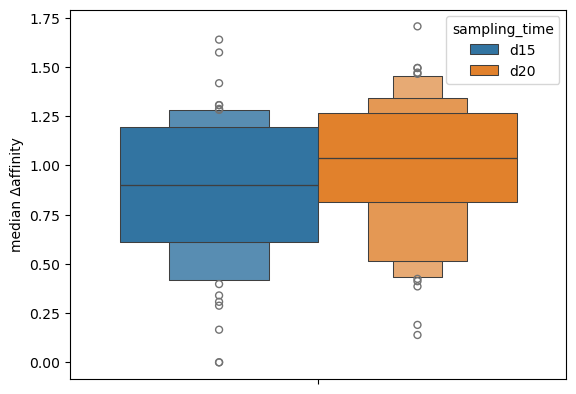

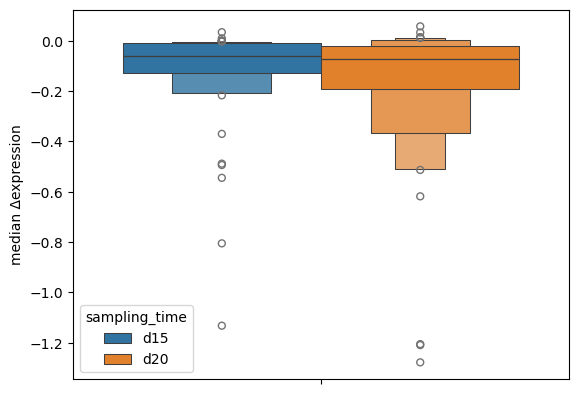

In [14]:
sns.boxenplot(data=gc_summary, y="median Δaffinity", hue="sampling_time")
plt.show()
sns.boxenplot(data=gc_summary, y="median Δexpression", hue="sampling_time")
plt.show()